In [19]:
#Library import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa.display

In [20]:
path_1 = 'example_files/cello.wav'
path_2 = 'example_files/piano.wav'

In [21]:
Audio(path_1)

In [22]:
Audio(path_2)

In [23]:
waveform_1 = librosa.load(path_1,sr = 44100)
waveform_2 = librosa.load(path_2,sr = 44100)

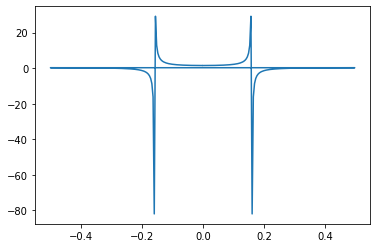

In [24]:
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real)

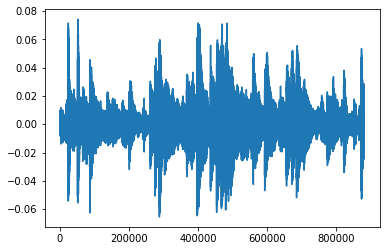

In [25]:
plt.plot(waveform_2[0])

In [26]:
stft_1 = np.abs(librosa.core.stft(waveform_1[0],n_fft = 4096))
stft_2 = np.abs(librosa.core.stft(waveform_2[0],n_fft = 4096))

In [27]:
stft_1[:256,:]

array([[0.04816159, 0.03713622, 0.05301895, ..., 0.0707608 , 0.07023432,
        0.40031838],
       [0.02992158, 0.10439396, 0.14852533, ..., 0.18913823, 0.2466733 ,
        0.504501  ],
       [0.05800857, 0.13907494, 0.2432442 , ..., 0.17628086, 0.34499863,
        0.4268436 ],
       ...,
       [0.21207377, 0.1329735 , 0.05474289, ..., 0.05141079, 0.01968435,
        0.03150476],
       [0.23618785, 0.12377144, 0.04635506, ..., 0.09299413, 0.05748317,
        0.00345984],
       [0.20245695, 0.11115485, 0.0409473 , ..., 0.12567295, 0.09188928,
        0.04528547]], dtype=float32)

Text(0.5, 1.0, 'piano')

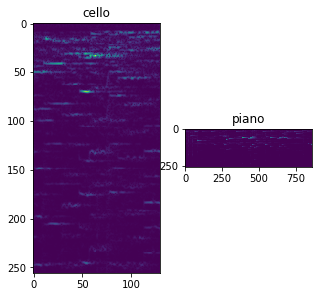

In [28]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
ax[0].imshow(stft_1[:256,:])
ax[0].set_title('cello')
ax[1].imshow(stft_2[:256,:])
ax[1].set_title('piano')

In [29]:
spec_1 = librosa.amplitude_to_db(stft_1)
spec_2 = librosa.amplitude_to_db(stft_2)

Text(0.5, 1.0, 'piano')

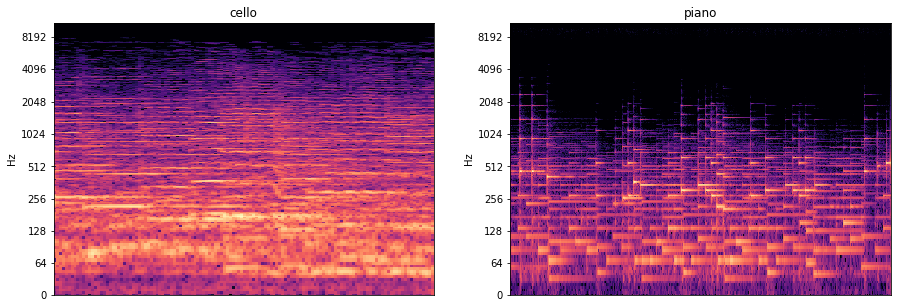

In [30]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
librosa.display.specshow(spec_1,y_axis='log',ax = ax[0])
ax[0].set_title('cello')
librosa.display.specshow(spec_2,y_axis='log',ax = ax[1])
ax[1].set_title('piano')

In [31]:
cqt_1 = np.abs(librosa.core.cqt(waveform_1[0],sr = 44100))
cqt_2 = np.abs(librosa.core.cqt(waveform_2[0],sr = 44100))

Text(0.5, 1.0, 'piano')

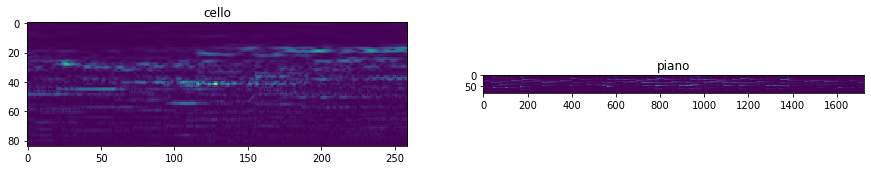

In [32]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,15))
ax[0].imshow(cqt_1)
ax[0].set_title('cello')
ax[1].imshow(cqt_2)
ax[1].set_title('piano')

Text(0.5, 1.0, 'piano')

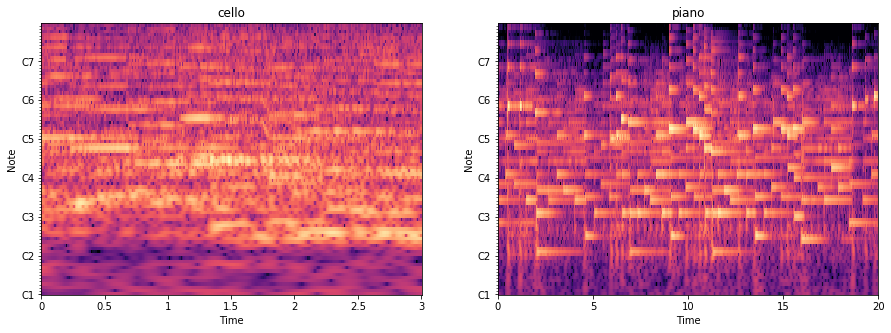

In [33]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
librosa.display.specshow(librosa.amplitude_to_db(cqt_1, ref=np.max),sr=44100, x_axis='time', y_axis='cqt_note',ax = ax[0])
ax[0].set_title('cello')
librosa.display.specshow(librosa.amplitude_to_db(cqt_2, ref=np.max),sr=44100, x_axis='time', y_axis='cqt_note',ax = ax[1])
ax[1].set_title('piano')